In [74]:
import numpy as np
import pandas as pd
import scipy.integrate as int
import scipy.optimize as op
import emcee
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.constants as const
import sys
from astropy.cosmology import wCDM
from scipy.interpolate import griddata
from astropy.cosmology import FlatLambdaCDM

In [75]:
# extracting columns of interest
#temp = np.loadtxt('/Users/eoin/Documents/Projects/Cosmology/Pantheon+/Pantheon+.dat', usecols=(2, 8, 9, 10, 11, 12, 13), unpack=False)
ID, z0, mb0, mberr0, mu0, muerr0, muCP0, calibrator0, RA0, DEC0 = np.loadtxt('/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main 2/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES.dat', usecols=(1, 2, 8, 9, 10, 11, 12, 13, 26, 27), unpack = True, skiprows = 1)
ra0 = RA0/180*np.pi; dec0=DEC0/180*np.pi

In [76]:
df = pd.read_csv('/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES.dat', sep = " ", header = 0)
df

,CID,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,...,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD
0,2011fe,51,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.74571,1.516210,...,0.1071,36,26.88590,0.864470,0.0991,1.4960,0.0381,0.005,1.000,0.003
1,2011fe,56,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.80286,1.517230,...,0.0579,101,88.30640,0.812220,0.0971,1.4960,-0.0252,0.003,1.000,0.004
2,2012cg,51,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.47030,0.781906,...,0.0278,165,233.50000,0.000358,0.0399,0.7134,0.0545,0.019,1.000,0.036
3,2012cg,56,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.49190,0.798612,...,0.0667,55,100.12200,0.000193,0.0931,0.7134,0.0622,0.028,1.000,0.040
4,1994DRichmond,50,0.00299,0.00084,0.00299,0.00004,0.00187,0.00004,11.52270,0.880798,...,0.0522,146,109.83900,0.988740,0.0567,0.6110,0.0650,0.009,1.000,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,rutledge,106,1.61505,0.00545,1.61499,0.00500,1.61399,0.00500,25.90650,0.331927,...,1.7256,8,2.92493,0.938980,0.2230,0.0106,-0.0203,0.005,1.000,0.002
1697,geta,106,1.69706,0.04006,1.69702,0.04000,1.70000,0.04000,26.03330,0.379521,...,1.8973,12,9.15387,0.689730,0.3209,0.0748,0.2680,0.005,0.633,0.000
1698,stone,106,1.80119,0.02014,1.80111,0.02000,1.80000,0.02000,26.23350,0.280685,...,1.1631,11,11.69320,0.387140,0.2370,0.0358,-0.0968,0.004,0.641,0.000
1699,wilson,106,1.91165,0.00263,1.91160,0.00100,1.91401,0.00100,26.17030,0.357624,...,1.4902,9,5.54378,0.784570,0.3168,0.0044,-0.3835,0.013,0.604,0.000


In [77]:
df.columns

Index(['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL',
       'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES',
       'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF',
       'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c',
       'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC',
       'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS',
       'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB',
       'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b',
       'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


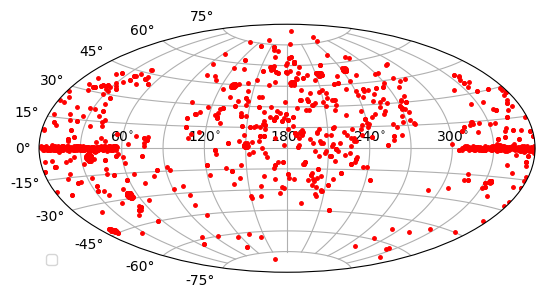

In [78]:
ra_rad = ra0-np.pi
dec_rad = dec0

fig = plt.figure()
ax = fig.add_subplot(111, projection='aitoff')
#ax.plot(RA_rad, DEC_rad, 'b.', markersize=1)
ax.plot(ra_rad, dec_rad, 'r.', markersize=5)
#ax.plot(168/180*np.pi-np.pi, -7/180*np.pi, 'ko', markersize=5, label='CMB dipole')
ax.set_xticklabels(['','$60^{\circ}$','','$120^{\circ}$','','$180^{\circ}$','','$240^{\circ}$','','$300^{\circ}$',''])
ax.legend(loc='lower left')
plt.grid(True)
plt.savefig('Pantheon+ sample full.png')
plt.show()

In [ ]:
ra_rad = ra0-np.pi
dec_rad = dec0

fig = plt.figure()
ax = fig.add_subplot(111, projection='aitoff')
#ax.plot(RA_rad, DEC_rad, 'b.', markersize=1)
ax.plot(ra_rad, dec_rad, 'r.', markersize=5)
#ax.plot(168/180*np.pi-np.pi, -7/180*np.pi, 'ko', markersize=5, label='CMB dipole')
ax.set_xticklabels(['','$60^{\circ}$','','$120^{\circ}$','','$180^{\circ}$','','$240^{\circ}$','','$300^{\circ}$',''])
ax.legend(loc='lower left')
plt.grid(True)
plt.savefig('Pantheon+ sample full.png')
plt.show()

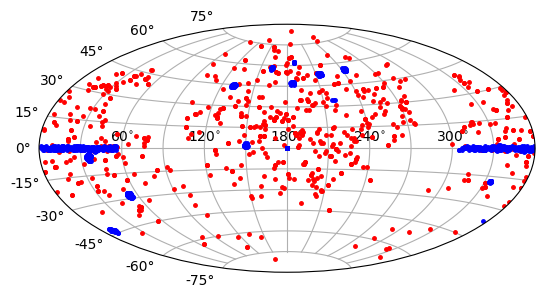

In [97]:
#splitting the sample
z_split = 0.1
ra_rad_split = np.where( z0 > z_split, ra_rad, 0)

dec_rad_split = np.where( z0 > z_split, dec_rad, 0)

ra_rad_split1 = np.where( z0 < z_split, ra_rad, 0)

dec_rad_split1 = np.where( z0 < z_split, dec_rad, 0)

#z_split 

fig = plt.figure()
ax = fig.add_subplot(111, projection='aitoff')
#ax.plot(RA_rad, DEC_rad, 'b.', markersize=1)
ax.plot(ra_rad_split1, dec_rad_split1, 'r.', markersize=5, )

ax.plot(ra_rad_split, dec_rad_split, 'b.', markersize=5)
#ax.plot(168/180*np.pi-np.pi, -7/180*np.pi, 'ko', markersize=5, label='CMB dipole')
ax.set_xticklabels(['','$60^{\circ}$','','$120^{\circ}$','','$180^{\circ}$','','$240^{\circ}$','','$300^{\circ}$',''])
#ax.legend(loc='lower left')
plt.grid(True)
plt.savefig('zplit>1blue.png', dpi=300)
plt.show()

In [6]:
# covariance matrix
cov0 = np.loadtxt(fname="/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main 2/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES_STAT+SYS.cov", delimiter=",", skiprows = 1)
cov0 = np.reshape(cov0, (1701, 1701))

In [7]:
#with open('/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES_STAT+SYS.cov') as f:
 #   lines = (line for line in f if not line.startswith('#'))
  #  FH = np.loadtxt(lines, delimiter=',', skiprows=1)

In [8]:
#cov0 = np.reshape(FH, (1701, 1701))

In [9]:
#df2= pd.read_csv("/Users/ruairimcconville/Desktop/Data Science/MSc - Project/Supernovae/DataRelease-main/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES_STAT+SYS.cov", header = 0)
#df2

In [10]:
#arr2 = df2.to_numpy()
#arr2

In [11]:
#cov0 = np.reshape(arr2, (1701, 1701))

In [12]:
cov0

array([[ 3.177108e-02,  5.754430e-03,  3.100600e-04, ...,  2.945500e-04,
        -8.595000e-05, -2.701100e-04],
       [ 5.754430e-03,  3.456656e-02,  6.595500e-04, ..., -2.863200e-04,
        -2.456300e-04, -2.363400e-04],
       [ 3.100600e-04,  6.595500e-04,  6.125745e-02, ...,  1.936450e-03,
         3.214810e-03,  4.000510e-03],
       ...,
       [ 2.945500e-04, -2.863200e-04,  1.936450e-03, ...,  4.157373e-02,
         4.902260e-03,  5.887030e-03],
       [-8.595000e-05, -2.456300e-04,  3.214810e-03, ...,  4.902260e-03,
         6.742823e-02,  8.751110e-03],
       [-2.701100e-04, -2.363400e-04,  4.000510e-03, ...,  5.887030e-03,
         8.751110e-03,  4.499005e-02]])

In [13]:
# isolating calibrators for determining M
x = calibrator0 == 1
cov1 = (cov0)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
mb1 = mb0[x]
muCP1 = muCP0[x]
ra1 = RA0[x]/180*np.pi 
dec1 = DEC0[x]/180*np.pi
Cinv1 = np.linalg.pinv(cov1)
vec1 = np.array([np.cos(dec1)*np.cos(ra1), np.cos(dec1)*np.sin(ra1), np.sin(dec1)])
print(len(ra1))
print(len(x))

77
1701


In [14]:
# remaining SN
x = calibrator0 == 0
cov2 = (cov0)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
z2 = z0[x]
mb2 = mb0[x]
ra2 = RA0[x]/180*np.pi 
dec2 = DEC0[x]/180*np.pi
Cinv2 = np.linalg.pinv(cov2)
vec2 = np.array([np.cos(dec2)*np.cos(ra2), np.cos(dec2)*np.sin(ra2), np.sin(dec2)])
print(len(ra2)) 
print(len(dec2))
print(len(x))

1624
1624
1701


In [15]:
# cutting the redshift range of the remaining SN
x = np.logical_and(0.0233 < z2, z2 < 0.15)
cov3 = (cov2)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
z3 = z2[x]
mb3 = mb2[x]
ra3 = ra2[x]
dec3 = dec2[x]
vec3 = np.array([np.cos(dec3)*np.cos(ra3), np.cos(dec3)*np.sin(ra3), np.sin(dec3)])
print(len(cov3))
print(len(x))

490
1624


In [16]:
# defining functions 
def integrand(z, om):
    return 1/np.sqrt(1-om+om*(1+z)**3)

def integrand1(z, om):
    return (z**3+3*z**2+3*z)/(1-om+om*(1+z)**3)**(3/2)

def integrand2(z, om):
    return (z**3+3*z**2+3*z)**2/(1-om+om*(1+z)**3)**(5/2)

def domQ(z, om):
    return 5/2/np.log(10)*int.quad(integrand1, 0.0, z, args =(om))[0]/int.quad(integrand, 0.0, z, args =(om))[0]

def domQ2(z, om):
    return 5/4/np.log(10)/int.quad(integrand, 0.0, z, args =(om))[0]*(int.quad(integrand1, 0.0, z, args =(om))[0]**2/int.quad(integrand, 0.0, z, args =(om))[0]-3*int.quad(integrand2, 0.0, z, args =(om))[0])
    
def func(z, h0, om):
    res = 25+5*np.log10(const.c/1000) + 5*np.log10(1+z) - 5*np.log10(h0) + 5*np.log10(int.quad(integrand, 0.0, z, args =(om)))
    return res[0]

func = np.vectorize(func)
domQ = np.vectorize(domQ)
domQ2 = np.vectorize(domQ2)

In [17]:
#picking direction in the direction of CMB dipole
# splitting the cephids
r = 168/180*np.pi; d = -7/180*np.pi;
vec = np.array([np.cos(d)*np.cos(r), np.cos(d)*np.sin(r), np.sin(d)])
print(vec)
x = vec.dot(vec1) >= 0
y = np.logical_not(x)
#print(x)
#print(np.logical_not(x))
cov1n = (cov1)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
mb1n = mb1[x]
muCP1n = muCP1[x]
ra1n = ra1[x]
dec1n = dec1[x]
cov1s = (cov1)[y[:,np.newaxis]&y[np.newaxis,:]].reshape((y.sum(),y.sum()))
mb1s = mb1[y]
muCP1s = muCP1[y]
ra1s = ra1[y]
dec1s = dec1[y]
Cinv1n = np.linalg.pinv(cov1n)
Cinv1s = np.linalg.pinv(cov1s)
print(len(cov1n),len(cov1s))

[-0.97085664  0.20636195 -0.12186934]
56 21


In [18]:
x = vec.dot(vec3) >= 0
y = np.logical_not(x)
#print(x)
#print(np.logical_not(x))
cov3n = (cov3)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
z3n = z3[x]
mb3n = mb3[x]
ra3n = ra3[x]
dec3n = dec3[x]
cov3s = (cov3)[y[:,np.newaxis]&y[np.newaxis,:]].reshape((y.sum(),y.sum()))
z3s = z3[y]
mb3s = mb3[y]
ra3s = ra3[y]
dec3s = dec3[y]
Cinv3n = np.linalg.pinv(cov3n)
Cinv3s = np.linalg.pinv(cov3s)
print(len(ra3n),len(ra3s))
print(len(x))

222 268
490


In [19]:
# defining likelihood
def lnlike(u):
    h0 = u[0]   
    om = u[1]
    M = u[2]
    
    Q1 = mb1n-M-muCP1n
    chi1 = -1/2*Q1.dot(Cinv1n).dot(Q1)
    
    Q3 = mb3n-func(z3n, h0, om)-M
     
    chi2 = -1/2*Q3.dot(Cinv3n).dot(Q3)          
    
    return chi1+chi2

In [20]:
# extremising likelihood

nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [70, 0.3, -19.36], method = 'L-BFGS-B', bounds = ((0, 150),(0, 8),(-21, -19)), options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-15, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20})
h0, om, M = result["x"]
print(h0, om, M)
#print((h0/100)**2*om)

74.52327198305565 0.09164915970459996 -19.242426984401604


In [54]:
# fisher matrix
Q3 = mb3n-func(z3n, h0, om)-M #Qtilda
L1 = len(Cinv1n); L2 = len(Cinv3n); 
print(L1, L2)
Q1M = np.full(L1, -1) #derivative of Qprime 

Q3M = np.full(L2, -1) #Qtilda 

Q3h0 = np.full(L2, 5/h0/np.log(10))

Q3h02 = np.full(L2, -5/h0**2/np.log(10)) #formula 4 in the paper

Q3om = domQ(z3n, om) #derivative of Q3 with respecct to m

Q3om2 = domQ2(z3n, om)

Q3om2

F = [[Q1M.dot(Cinv1n).dot(Q1M)+Q3M.dot(Cinv3n).dot(Q3M), Q3M.dot(Cinv3n).dot(Q3h0), Q3M.dot(Cinv3n).dot(Q3om)], 
     [Q3h0.dot(Cinv3n).dot(Q3M), Q3h0.dot(Cinv3n).dot(Q3h0)+Q3.dot(Cinv3n).dot(Q3h02), Q3h0.dot(Cinv3n).dot(Q3om)], 
     [Q3om.dot(Cinv3n).dot(Q3M), Q3om.dot(Cinv3n).dot(Q3h0), Q3om.dot(Cinv3n).dot(Q3om)+Q3.dot(Cinv3n).dot(Q3om2)]]
print('error')
np.sqrt(np.diag(np.linalg.pinv(F))) #function

ValueError: operands could not be broadcast together with shapes (331,) (8,) (8,) 

In [22]:
#defining the grid on the sky

RA, DEC = np.mgrid[0:2*np.pi:31j, -np.pi/2:np.pi/2:11j]
points = np.array([RA.flatten(),DEC.flatten()]).T

In [23]:
#performing the scan
output = [] 

for j in np.arange(0, len(points), 1):
    ra, dec = points[j]
    
#    if i % 100 == 0: 
#        print(i)
    print(ra, dec)
    
    
    vec0 = np.array([np.cos(dec)*np.cos(ra), np.cos(dec)*np.sin(ra), np.sin(dec)])
    
    # SN in Cepheid hosts
    x = vec0.dot(vec1) >= 0
    y = np.logical_not(x)
    cov1n = (cov1)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
    mb1n = mb1[x]
    muCP1n = muCP1[x]
    ra1n = ra1[x]
    dec1n = dec1[x]
    cov1s = (cov1)[y[:,np.newaxis]&y[np.newaxis,:]].reshape((y.sum(),y.sum()))
    mb1s = mb1[y]
    muCP1s = muCP1[y]
    ra1s = ra1[y]
    dec1s = dec1[y]
    Cinv1n = np.linalg.pinv(cov1n)
    Cinv1s = np.linalg.pinv(cov1s)
#    print(len(cov1n), len(cov1s))
    
    # SN
    x = vec0.dot(vec3) >= 0
    y = np.logical_not(x)
    cov3n = (cov3)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
    z3n = z3[x]
    mb3n = mb3[x]
    ra3n = ra3[x]
    dec3n = dec3[x]
    cov3s = (cov3)[y[:,np.newaxis]&y[np.newaxis,:]].reshape((y.sum(),y.sum()))
    z3s = z3[y]
    mb3s = mb3[y]
    ra3s = ra3[y]
    dec3s = dec3[y]
    Cinv3n = np.linalg.pinv(cov3n)
    Cinv3s = np.linalg.pinv(cov3s)
    print(len(ra3n), len(ra3s))
    
    def hemiN(u):
        h0 = u[0]   
        om = u[1]
        M = u[2]
    
        Q1 = mb1n-M-muCP1n
        chi1 = 1/2*Q1.dot(Cinv1n).dot(Q1)
    
        Q3 = mb3n-func(z3n, h0, om)-M
     
        chi2 = 1/2*Q3.dot(Cinv3n).dot(Q3)          
    
        return chi1+chi2
    
    def hemiS(u):
        h0 = u[0]   
        om = u[1]
        M = u[2]
    
        Q1 = mb1s-M-muCP1s
        chi1 = 1/2*Q1.dot(Cinv1s).dot(Q1)
    
        Q3 = mb3s-func(z3s, h0, om)-M
     
        chi2 = 1/2*Q3.dot(Cinv3s).dot(Q3)          
    
        return chi1+chi2
    
    result = op.minimize(hemiN, [70, 0.3, -19.36], method = 'L-BFGS-B', bounds = ((0, 150),(0, 8),(-21, -19)), options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-15, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20})
    h0N, omN, MN = result["x"]
    print(h0N, omN, MN)
    
    Q3 = mb3n-func(z3n, h0N, omN)-MN
    L1 = len(Cinv1n); L3 = len(Cinv3n);
    print(L1, L3)
    Q1M = np.full(L1, -1)
    Q3M = np.full(L3, -1)
    Q3h0 = np.full(L3, 5/h0N/np.log(10))
    Q3h02 = np.full(L3, -5/h0N**2/np.log(10))
    Q3om = domQ(z3n, omN)
    Q3om2 = domQ2(z3n, omN)
    F = [[Q1M.dot(Cinv1n).dot(Q1M)+Q3M.dot(Cinv3n).dot(Q3M), Q3M.dot(Cinv3n).dot(Q3h0), Q3M.dot(Cinv3n).dot(Q3om)], [Q3h0.dot(Cinv3n).dot(Q3M), Q3h0.dot(Cinv3n).dot(Q3h0)+Q3.dot(Cinv3n).dot(Q3h02), Q3h0.dot(Cinv3n).dot(Q3om)], [Q3om.dot(Cinv3n).dot(Q3M), Q3om.dot(Cinv3n).dot(Q3h0), Q3om.dot(Cinv3n).dot(Q3om)+Q3.dot(Cinv3n).dot(Q3om2)]]
    MNerr, h0Nerr, omNerr = np.sqrt(np.diag(np.linalg.pinv(F)))
    print(h0Nerr, omNerr, MNerr)
    
    
    result = op.minimize(hemiS, [70, 0.3, -19.36], method = 'L-BFGS-B', bounds = ((0, 150),(0, 8),(-21, -19)), options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-15, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20})
    h0S, omS, MS = result["x"]
    print(h0S, omS, MS)
    
    Q3 = mb3s-func(z3s, h0S, omS)-MS
    L1 = len(Cinv1s); L3 = len(Cinv3s);
    print(L1, L3)
    Q1M = np.full(L1, -1)
    Q3M = np.full(L3, -1)
    Q3h0 = np.full(L3, 5/h0S/np.log(10))
    Q3h02 = np.full(L3, -5/h0S**2/np.log(10))
    Q3om = domQ(z3s, omS)
    Q3om2 = domQ2(z3s, omS)
    F = [[Q1M.dot(Cinv1s).dot(Q1M)+Q3M.dot(Cinv3s).dot(Q3M), Q3M.dot(Cinv3s).dot(Q3h0), Q3M.dot(Cinv3s).dot(Q3om)], [Q3h0.dot(Cinv3s).dot(Q3M), Q3h0.dot(Cinv3s).dot(Q3h0)+Q3.dot(Cinv3s).dot(Q3h02), Q3h0.dot(Cinv3s).dot(Q3om)], [Q3om.dot(Cinv3s).dot(Q3M), Q3om.dot(Cinv3s).dot(Q3h0), Q3om.dot(Cinv3s).dot(Q3om)+Q3.dot(Cinv3s).dot(Q3om2)]]
    MSerr, h0Serr, omSerr = np.sqrt(np.diag(np.linalg.pinv(F)))
    print(h0Serr, omSerr, MSerr)

    
    output.append([ra, dec, h0N, h0S, h0Nerr, h0Serr])
    
output = np.array(output)

0.0 -1.5707963267948966
159 331
74.02027599719999 0.245847254786144 -19.244323284046104
44 159
1.5176957446094526 0.1709804048339213 0.038067475939608186
73.31915857711532 0.2887940407731556 -19.250114098975605
33 331
1.3920963352851068 0.1439352598563398 0.03767914284914474
0.0 -1.2566370614359172
217 273
72.77107665531354 0.2414649016710255 -19.275152115755226
30 217
1.6343537598160691 0.14180915154974857 0.04398215846383052
74.03539659999633 0.2856599212405986 -19.230539173872653
47 273
1.370212462358088 0.24554412869032452 0.034325127510991184
0.0 -0.9424777960769379
233 257
72.13880274792878 0.36705468452131124 -19.272113157155214
27 233
1.6483981848010438 0.14591075491490893 0.045100746713543735
74.44074500747276 0.17724359893454206 -19.235672679239414
50 257
1.3675232784506413 0.239406467907572 0.033976898505958746
0.0 -0.6283185307179586
243 247
72.18544252132334 0.3688827461817137 -19.270407658966608
25 243
1.6978837968060252 0.144475561510608 0.046953533964615546
74.402930825

In [24]:


RA, DEC, H0N, H0S, H0NERR, H0SERR = output.T
H0DIFF=(H0N-H0S)/np.sqrt(H0NERR**2+H0SERR**2)
#H0DIFF=(H0N-H0S)
x = H0DIFF == np.max(H0DIFF)
print(RA[x]/np.pi*180, DEC[x]/np.pi*180)

[252.] [-72.]


In [25]:
x, y = np.mgrid[0:2*np.pi:360j, -np.pi/2:np.pi/2:180j]

In [26]:
grid_z = griddata(points, H0DIFF.flatten(), (x, y), method='cubic')

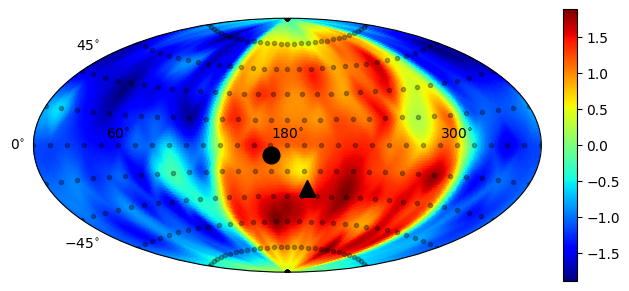

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='aitoff')
im = ax.pcolormesh(x-np.pi, y, grid_z, vmin = np.min(H0DIFF), vmax=np.max(H0DIFF), cmap=plt.cm.jet)
fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
#ax.plot(140, -6, 'ks', markersize=12, label='Secrest et al.')
ax.plot(168/180*np.pi-np.pi, -7/180*np.pi, 'ko', markersize=12, label='CMB dipole')
ax.plot(195.02/180*np.pi-np.pi, -30/180*np.pi, 'k^', markersize=12, label='Shapley')
ax.plot(points[:,0]-np.pi, points[:,1], 'k.', alpha= 0.3)
ax.set_xticklabels(['','$60^{\circ}$','','','','$180^{\circ}$','','','','$300^{\circ}$',''])
ax.set_yticklabels(['','','$-45^{\circ}$','','','$0^{\circ}$','','','$45^{\circ}$','',''])
plt.tight_layout()
plt.savefig('dipole_H0_001_z_07_aitoff_absolute.png', dpi=300)
plt.show()

In [28]:
13/24*360+25*1/(24*60)

195.01736111111111

In [29]:
#np.savetxt('SN_001_z_07.txt', output)

In [30]:
#output = []
#zrange = np.arange(0.1, 0.9, 0.1)
#for i in zrange:
    
#    x = np.logical_and(i-0.1 < z0, z0 <= i)
#    cov = (cov0)[x[:,np.newaxis]&x[np.newaxis,:]].reshape((x.sum(),x.sum()))
#    z = z0[x]
#    mu = mu0[x]
#    print(i, len(mu))
    
#    popt, pcov = op.curve_fit(func, z, mu, [70, 0.3], sigma=cov, bounds = ((0,0), (100, 1)), absolute_sigma=True)
#    h0, om = popt
    
#    output.append([popt[0], popt[1], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1])])

#output = np.array(output)

In [31]:
#H0, OM, H0err, OMerr = output.T
#new_zrange = np.linspace(0.1, 0.8, 91)
#f = interpolate.interp1d(zrange, OM, kind='cubic')
#ferr = interpolate.interp1d(zrange, OMerr, kind='cubic')
#new_OM = f(new_zrange); new_OMerr = ferr(new_zrange);
#g = interpolate.interp1d(zrange, H0, kind='cubic')
#gerr = interpolate.interp1d(zrange, H0err, kind='cubic')
#new_H0 = g(new_zrange); new_H0err = gerr(new_zrange);

In [32]:
#plt.plot(new_zrange, new_OM, 'r-')
#plt.plot(new_zrange, new_OM+new_OMerr, 'r--')
#plt.plot(new_zrange, new_OM-new_OMerr, 'r--')
#plt.errorbar(zrange, OM, yerr=OMerr, fmt='o')
#plt.fill_between(new_zrange, new_OM+new_OMerr, new_OM-new_OMerr, alpha=0.3)
#plt.fill_between(new_zrange, 0.3153+0.007, 0.3153+0.007, alpha=0.3, color='black')
#plt.xlabel('$z_{min}$', fontsize=15)
#plt.ylabel('$\Omega_m$', fontsize=15)
#plt.ylim(-1, 2)
#plt.savefig('pantheon+_zmin_vs_om.png', dpi=300)
#plt.show()

In [33]:
#plt.plot(new_zrange, new_H0, 'r-')
#plt.plot(new_zrange, new_H0+new_H0err, 'r--')
#plt.plot(new_zrange, new_H0-new_H0err, 'r--')
#plt.errorbar(zrange, H0, yerr=H0err, fmt='o')
#plt.fill_between(new_zrange, new_H0+new_H0err, new_H0-new_H0err, alpha=0.3)
#plt.hlines(67.36,0.1, 0.8)
#plt.xlabel('$z_{min}$', fontsize=15)
#plt.ylabel('$H_0$', fontsize=15)
#plt.savefig('pantheon+_zmin_vs_h0.png', dpi=300)
#plt.show()

In [34]:
# setting up MCMC
def lnprior(u):
    h0 = u[0]
    om = u[1]
    M = u[2]

    if 0 < h0 < 150 and 0 < om < 8 and -21 < M < -19: 
        return 0.0
    return -np.inf

In [35]:
def lnprob(u):
    lp = lnprior(u)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(u)

In [36]:
ndim, nwalkers = 3, 30
pos = [[h0, om, M] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [37]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

In [38]:
sampler.run_mcmc(pos, 2000, progress=True);

100%|██████████| 2000/2000 [48:21<00:00,  1.45s/it]


In [39]:
tau = sampler.get_autocorr_time()
print(tau)

[33.69855811 30.87563371 29.83630774]


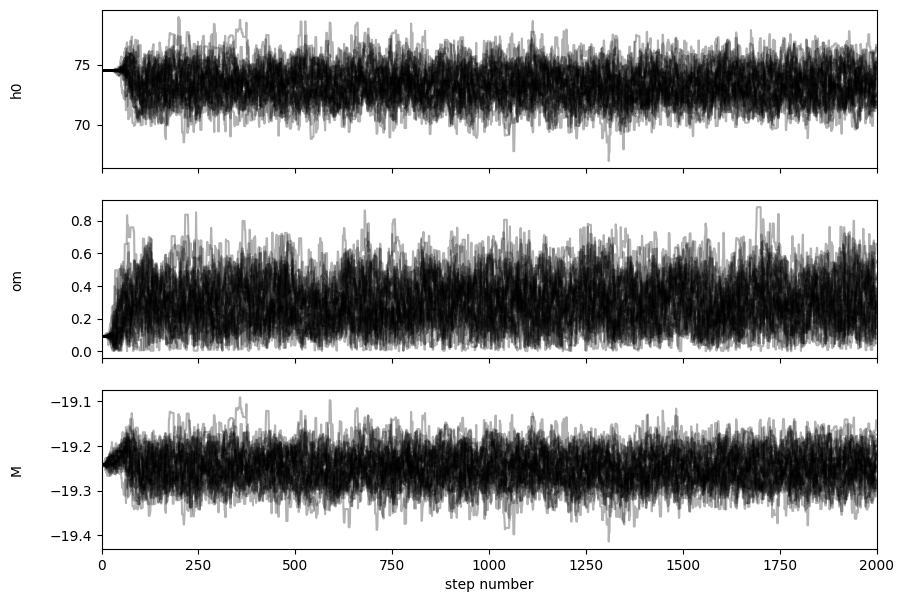

In [40]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["h0", "om", "M"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [41]:
samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

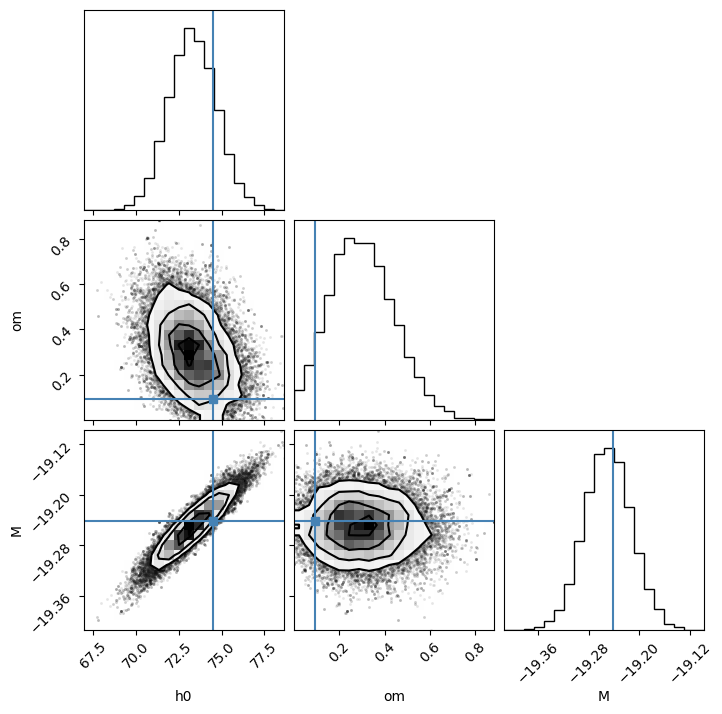

In [42]:
import corner
fig = corner.corner(samples, labels=["h0", "om", "M"], truths=[h0, om, M])
#fig.savefig("CC_BAO_SNe_bin4_corner.png")

In [43]:
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
print(flat_samples.shape)

(3000, 3)


In [44]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    #err = 1/2*(q[0]+q[1])
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #txt = "\mathrm{{{2}}} = {0:.2f}\pm{{{1:.2f}}}"
    #txt = txt.format(mcmc[1], err, labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
np.savetxt("SN_chain_south.txt", flat_samples)

In [46]:
(75.653-72.644)/np.sqrt(1.668**2+1.109**2)

1.502228657377336

In [47]:
#samples = np.loadtxt("SN_chain_zmin1_prior5.txt")
H0, OM, MB = samples.T

In [48]:
A = H0**2*(1-OM); B = H0**2*OM;

In [49]:
np.savetxt("SN_chain_zmin1_AB_prior5.txt", np.vstack((A,B)).T)

In [50]:
np.percentile(H0, [16, 50, 84])

array([71.92705199, 73.300358  , 74.69514142])

In [51]:
zmin = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
zrange = np.linspace(0.25, 1.05)
h0 = np.array([72.01, 72.48, 76.47, 76.10, 78.76, 68.36, 52.14, 44.27])
h0p = np.array([1.39, 1.91, 2.49, 3.48, 4.37, 9.34, 13.27, 11.03])
h0m = np.array([1.37, 1.99, 2.72, 4.01, 4.96, 11.24, 10.37, 6.10])
h0_asym_err = [h0m,h0p]
om = np.array([0.39, 0.374, 0.264, 0.272, 0.221, 0.397, 1.047, 1.67])
omp = np.array([0.044, 0.064, 0.07, 0.110, 0.113, 0.411, 1.036, 0.889])
omm = np.array([0.041, 0.059, 0.057, 0.077, 0.074, 0.188, 0.589, 0.846])
om_asym_err = [omm,omp]

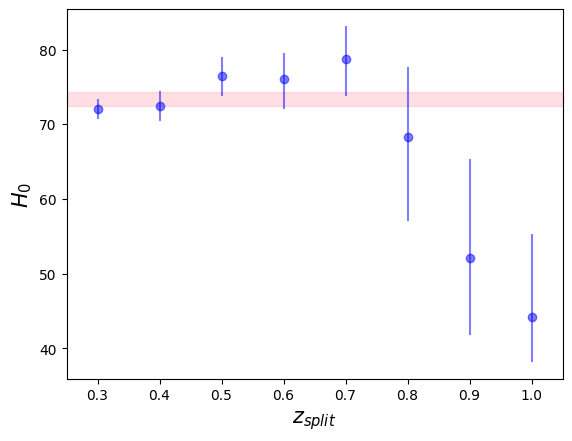

In [52]:
plt.fill_between(zrange, 73.41+0.97, 72.41, alpha=0.5, color='pink')
plt.errorbar(zmin, h0, yerr=h0_asym_err, fmt='bo', alpha=0.5)
plt.xlabel('$z_{split}$', fontsize=15)
plt.ylabel('$H_0$', fontsize=15)
plt.xlim(0.25, 1.05)
#plt.tight_layout()
#plt.savefig('h0_vs_z.png', dpi=300)
plt.show()

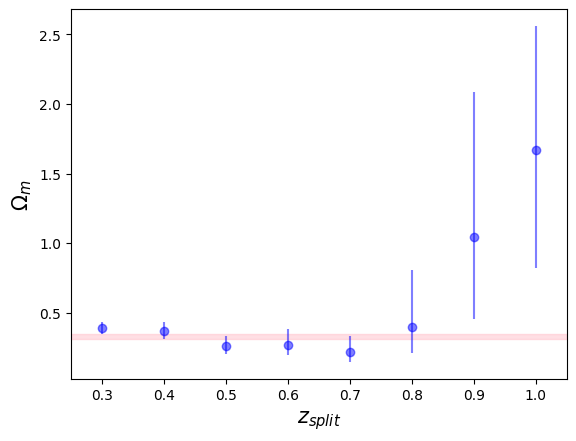

In [53]:
plt.fill_between(zrange, 0.333+0.018, 0.333-0.017, alpha=0.5, color='pink')
plt.errorbar(zmin, om, yerr=om_asym_err, fmt='bo', alpha=0.5)
plt.xlabel('$z_{split}$', fontsize=15)
plt.ylabel('$\Omega_m$', fontsize=15)
plt.xlim(0.25, 1.05)
#plt.tight_layout()
#plt.savefig('om_vs_z.png', dpi=300)
plt.show()